# Will age and time played predict subscribe status of the players in the minecraft server?

## Introduction:

The goal of this project is to analyze real data sets to generate predictive insights that can inform and guide the project's direction. The data set used is the MineCraft server established by a research group in Computer Science at the University of British Columbia (UBC), led by Frank Wood. The server monitors each player's actions as they explore the game in order to collect and investigate data on a player’s behaviour with video games. However, due to limited resources, the research team needs to know how to target their recruitment effectively to ensure that the server can handle the quantity of players that will prove the maximum amount of data.

>>*Our research question is: can a player’s age and time played in the server predict their newsletter subscription status?*

The data set that we are using for this project is the **player.csv**, as it contains all the variables needed to predict the subscription status. There are 196 observations and 7 variables within this set. 

These are the 7 variables in the **player.csv**: 

- `experience` (character ) = skill level the player is at (Pro, Veteran, Regular, Amateur)
  
- `hashedEmail` (character ) =  hashed emails of the participants

  
- `Name` (character ) = name of all participants

  
- `Gender` (character ) = gender of participants (Male, Female, Non-binary, Agender, Prefer not to say, Two-Spirited)

  
- `Played_hours` (double) = total time of played hours

  
- `Age` (double) = ages of participants

  
- `Subscribe` (logical ) = subscription status, TRUE (subscribed) and FALSE (not subscribed)

We aim to use this dataset to build a classification model that will determine if the connection between age and time played can predict whether or not the player is subscribed to the newsletter. Based on calculated results, the information will aid the research team more effectively with finding their target market.

attaching packages

In [6]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

loading in data

In [7]:
players <- read_csv(file = "https://raw.githubusercontent.com/sofiezalkan/DSCI-100-Group-Project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


data is tidy (column is a single variable, row is a single observation, cell is a single value), we want to filter it down to just get the columns we need, and we wanna remove na values

In [19]:
players_clean <- players |>
                select(played_hours, Age, subscribe) |>
                filter(Age != "NA") 
players_clean

played_hours,Age,subscribe
<dbl>,<dbl>,<lgl>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
0.7,21,TRUE
0.1,21,TRUE
⋮,⋮,⋮
0.0,20,TRUE
0.0,17,TRUE
0.3,22,FALSE


let's look at some summary statistics for age and played hours

In [20]:
players_stats <- players_clean |>
                    summarize(mean_age = mean(Age), median_age = median(Age), sd_age = sd(Age),
                              mean_hrs = mean(played_hours), median_hrs = median(played_hours), sd_hrs = sd(played_hours))
players_stats

mean_age,median_age,sd_age,mean_hrs,median_hrs,sd_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,19,6.174667,5.904639,0.1,28.49793


We can gather from this that on average, the players are around 20 years old, with a spread out age distribution. The distribution of played hours is very spread out and the mean and median are quite far apart, implying a very large skew to the right. The "average" player has played for around 5 hours.

let's also look at the portion of subscribed vs. unsubscribed

In [22]:
subscribe_count <- players_clean |>
                            count(subscribe)
subscribe_count

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,142


more people are subscribed to the newsletter than not subscribed, with about 73% of the sample being subscribed.

let's make some visualizations of this data

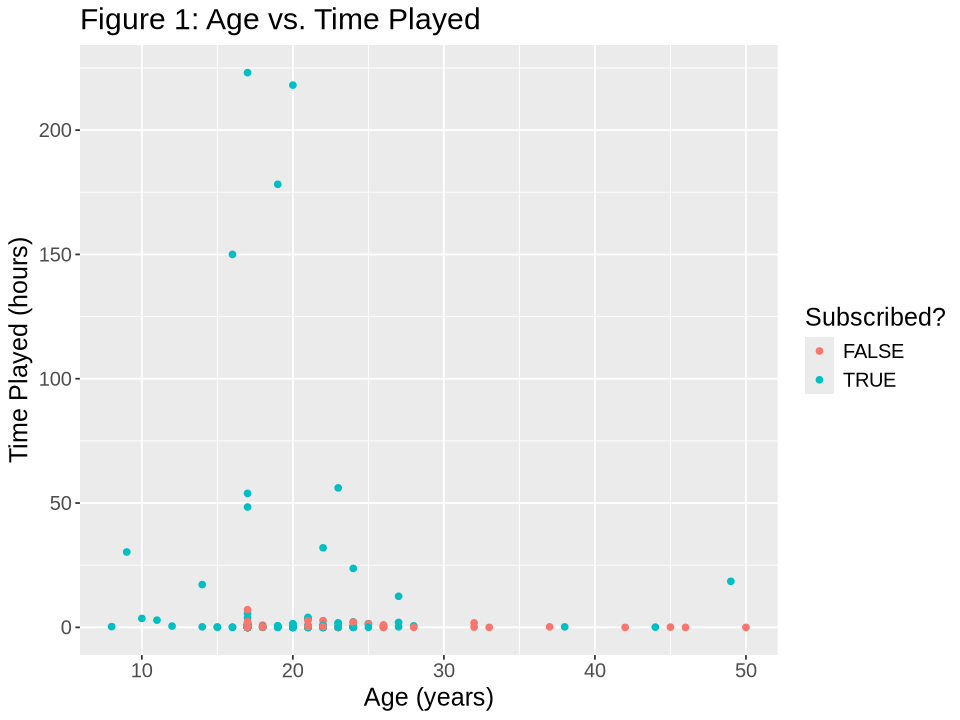

In [25]:
options(repr.plot.width = 8, repr.plot.height = 6)

all_plot <- players_clean |>
                ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
                geom_point() +
                labs(x = "Age (years)", y = "Time Played (hours)", colour = "Subscribed?") +
                ggtitle("Figure 1: Age vs. Time Played") +
                theme(text = element_text(size = 15))
all_plot

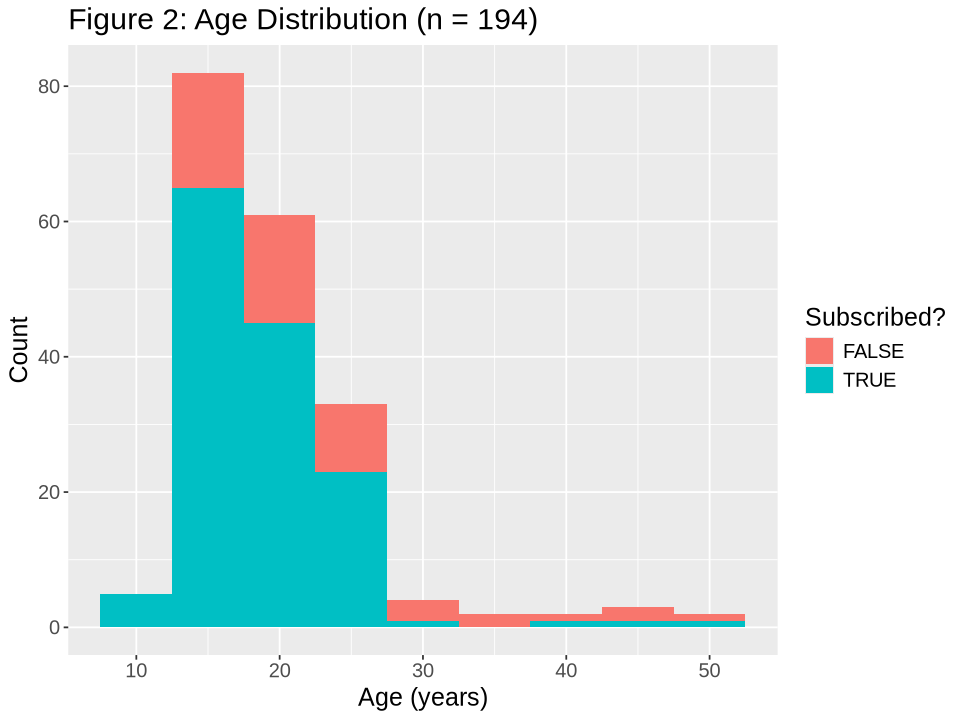

In [35]:
options(repr.plot.width = 8, repr.plot.height = 6)

age_dist <- players_clean |>
            ggplot(aes(x = Age, fill = subscribe)) +
            geom_histogram(binwidth = 5) +
            labs(x = "Age (years)", y = "Count", fill = "Subscribed?") +
            ggtitle("Figure 2: Age Distribution (n = 194)") +
            theme(text = element_text(size = 15))
age_dist            

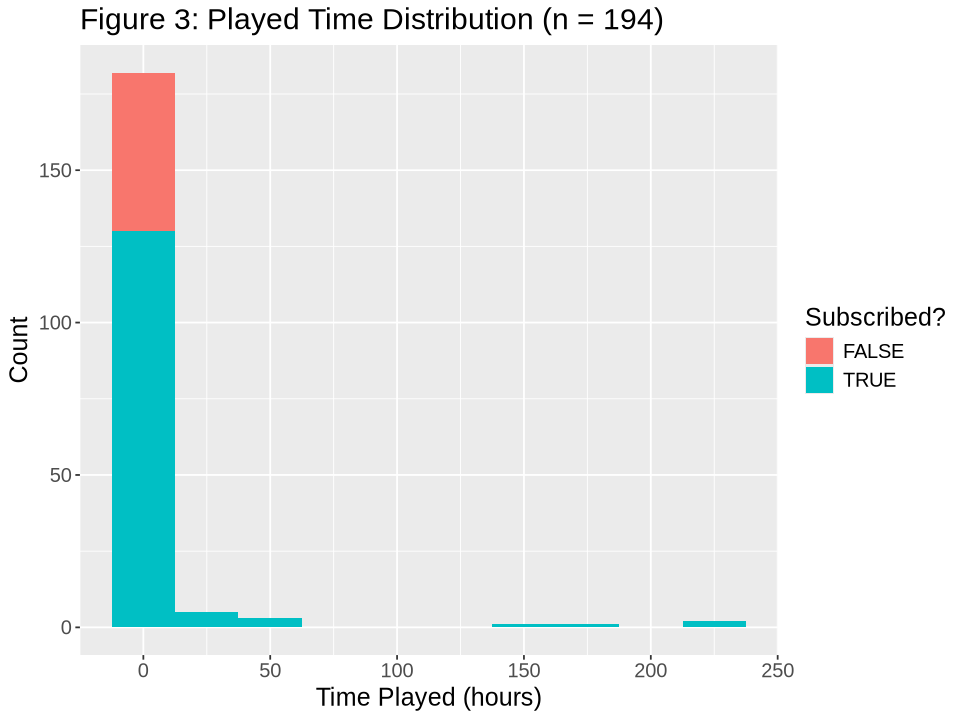

In [29]:
options(repr.plot.width = 8, repr.plot.height = 6)

time_dist <- players_clean |>
            ggplot(aes(x = played_hours, fill = subscribe)) +
            geom_histogram(binwidth = 25) +
            labs(x = "Time Played (hours)", y = "Count", fill = "Subscribed?") +
            ggtitle("Figure 3: Played Time Distribution (n = 194)") +
            theme(text = element_text(size = 15))
time_dist

both distributions are skewed to the right and the plot of both variables does not show a particular correlation between age and time, the predictor variables, but there seems to be a possible trend in subscribed vs. unsubscribed

we want to see if age and time can predict if someone will subscribe to a newsletter so we will be using KNN classification, and we will be splitting the data into a training and testing set

In [46]:
set.seed(2345) # DON'T CHANGE THIS GUYS. for further steps use a different seed from this one but keep that same seed all throughout the rest

players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)
players_train
players_test

played_hours,Age,subscribe
<dbl>,<dbl>,<lgl>
0.0,17,FALSE
0.0,21,FALSE
0.0,22,FALSE
1.4,25,FALSE
0.0,24,FALSE
⋮,⋮,⋮
32.0,22,TRUE
0.1,44,TRUE
0.0,17,TRUE


played_hours,Age,subscribe
<dbl>,<dbl>,<lgl>
30.3,9,TRUE
3.8,17,TRUE
0.1,17,TRUE
0.0,22,TRUE
1.6,23,TRUE
⋮,⋮,⋮
0.0,50,FALSE
0.1,17,TRUE
0.0,17,TRUE


let's make a recipe to standardize the data

In [43]:
knn_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
knn_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



and a model configuration, let's start with 3 neighbors for now, we will tune it later

In [39]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
      set_engine("kknn") |>
      set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


now let's make a workflow

In [44]:
knn_workflow <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(knn_spec)
knn_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


we now want to test our workflow on the testing data

my computer is about to die but i can finish this tomorrow! or any of you guys are welcome to continue this, bascially we need to
* fit the model to the testing data
* look at the metrics for those predictions
* load a confusion matrix
* do a 5 fold cross validation
* i plan on going back and tuning the classifier to find the best k value when i have enough time
* that's the gist of it, i can probably finish this later tonight or tomorrow